# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + '&units=' + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather['coord']['lat'])
        city_lng = (city_weather['coord']['lon'])
        city_max_temp = (city_weather['main']['temp_max'])
        city_humidity = (city_weather['main']['humidity'])
        city_clouds = (city_weather['clouds']['all'])
        city_wind = (city_weather['wind']['speed'])
        city_country = (city_weather['sys']['country'])
        city_date = (city_weather['dt'])

         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | salym
Processing Record 2 of Set 1 | sonsorol village
City not found. Skipping...
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | margaret river
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | tura
Processing Record 7 of Set 1 | ghat
Processing Record 8 of Set 1 | saacow
Processing Record 9 of Set 1 | constantia
Processing Record 10 of Set 1 | viligili
City not found. Skipping...
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | barcelos
Processing Record 14 of Set 1 | papatowai
Processing Record 15 of Set 1 | adamstown
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | callao
Processing Record 18 of Set 1 | dolbeau-mistassini
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | novodvinsk
Processing Record 21 of Set 1 | port-aux-francai

Processing Record 39 of Set 4 | tchibanga
Processing Record 40 of Set 4 | tralee
Processing Record 41 of Set 4 | yuzhno-kurilsk
Processing Record 42 of Set 4 | kavaratti
Processing Record 43 of Set 4 | nishinoomote
Processing Record 44 of Set 4 | zaozersk
Processing Record 45 of Set 4 | khanty-mansiysk
Processing Record 46 of Set 4 | codrington
Processing Record 47 of Set 4 | hammerfest
Processing Record 48 of Set 4 | la rinconada
Processing Record 49 of Set 4 | puerto santa
Processing Record 0 of Set 5 | mbamba bay
Processing Record 1 of Set 5 | ribeira brava
Processing Record 2 of Set 5 | ust-nera
Processing Record 3 of Set 5 | nouadhibou
Processing Record 4 of Set 5 | saint-pierre
Processing Record 5 of Set 5 | cairns city
City not found. Skipping...
Processing Record 6 of Set 5 | ishigaki
Processing Record 7 of Set 5 | gaspe
Processing Record 8 of Set 5 | kaifeng
Processing Record 9 of Set 5 | sur
Processing Record 10 of Set 5 | antigonish
Processing Record 11 of Set 5 | hobyo
Proc

Processing Record 29 of Set 8 | las palmas
Processing Record 30 of Set 8 | hadibu
Processing Record 31 of Set 8 | tynda
Processing Record 32 of Set 8 | puerto leguizamo
Processing Record 33 of Set 8 | gueltat zemmour
City not found. Skipping...
Processing Record 34 of Set 8 | howrah
Processing Record 35 of Set 8 | nar'yan-mar
Processing Record 36 of Set 8 | port alfred
Processing Record 37 of Set 8 | santa isabel
Processing Record 38 of Set 8 | madera
Processing Record 39 of Set 8 | guiuan
Processing Record 40 of Set 8 | am djarass
City not found. Skipping...
Processing Record 41 of Set 8 | columbia falls
Processing Record 42 of Set 8 | masterton
Processing Record 43 of Set 8 | gonzaga
Processing Record 44 of Set 8 | amga
Processing Record 45 of Set 8 | revda
Processing Record 46 of Set 8 | ulladulla
Processing Record 47 of Set 8 | daru
Processing Record 48 of Set 8 | carnarvon
Processing Record 49 of Set 8 | bol'sherech'ye
Processing Record 0 of Set 9 | smithers
Processing Record 1 of

Processing Record 16 of Set 12 | rockdale
Processing Record 17 of Set 12 | qapqal
City not found. Skipping...
Processing Record 18 of Set 12 | polyarnyy
Processing Record 19 of Set 12 | castillos
Processing Record 20 of Set 12 | paciran
Processing Record 21 of Set 12 | aljezur
Processing Record 22 of Set 12 | endeavour hills
Processing Record 23 of Set 12 | mejit
Processing Record 24 of Set 12 | vicuna
Processing Record 25 of Set 12 | portoferraio
Processing Record 26 of Set 12 | nadi
Processing Record 27 of Set 12 | blagoveshchenka
Processing Record 28 of Set 12 | cape coast
Processing Record 29 of Set 12 | laguna
Processing Record 30 of Set 12 | buenaventura
Processing Record 31 of Set 12 | vilcun
Processing Record 32 of Set 12 | baluntaicun
City not found. Skipping...
Processing Record 33 of Set 12 | nantucket
Processing Record 34 of Set 12 | jebba
Processing Record 35 of Set 12 | novoagansk
Processing Record 36 of Set 12 | funafuti
Processing Record 37 of Set 12 | el dorado
Process

---

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,salym,60.0625,71.4789,-2.43,95,100,1.36,RU,1699572063
1,ushuaia,-54.8000,-68.3000,9.81,71,75,5.81,AR,1699571766
2,margaret river,-33.9500,115.0667,13.83,71,100,3.43,AU,1699571933
3,ribeira grande,38.5167,-28.7000,20.99,94,94,8.05,PT,1699572064
4,tura,25.5198,90.2201,16.94,72,0,1.76,IN,1699572064


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salym,60.0625,71.4789,-2.43,95,100,1.36,RU,1699572063
1,ushuaia,-54.8000,-68.3000,9.81,71,75,5.81,AR,1699571766
2,margaret river,-33.9500,115.0667,13.83,71,100,3.43,AU,1699571933
3,ribeira grande,38.5167,-28.7000,20.99,94,94,8.05,PT,1699572064
4,tura,25.5198,90.2201,16.94,72,0,1.76,IN,1699572064


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

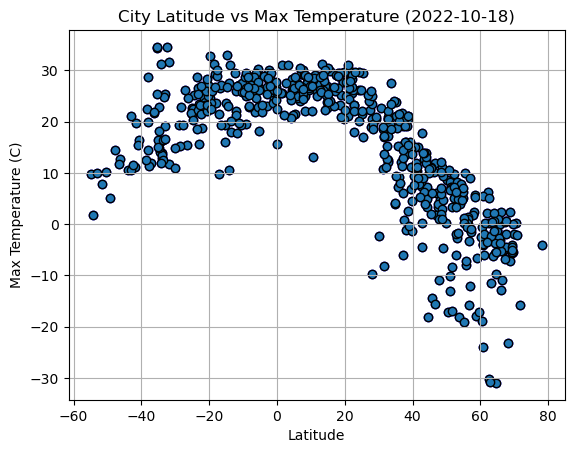

In [8]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values, color = 'blue')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs Max Temperature (2022-10-18)')

# Incorporate the other graph properties
plt.grid(True)
plt.scatter(x_values, y_values, edgecolors='k', linewidths=1)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

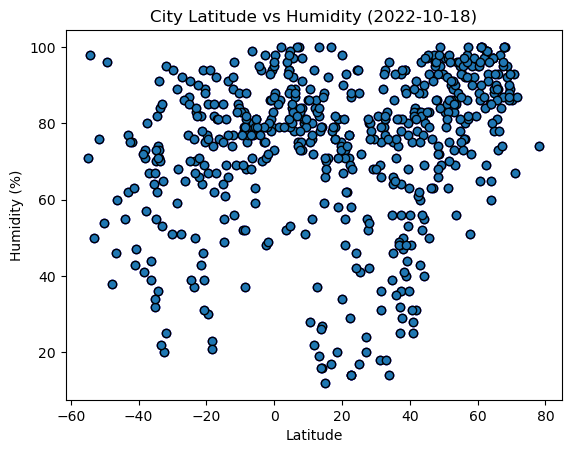

In [9]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values, color = 'blue')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2022-10-18)')
# Incorporate the other graph properties
plt.grid(False)
plt.scatter(x_values, y_values, edgecolors='k', linewidths=1)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

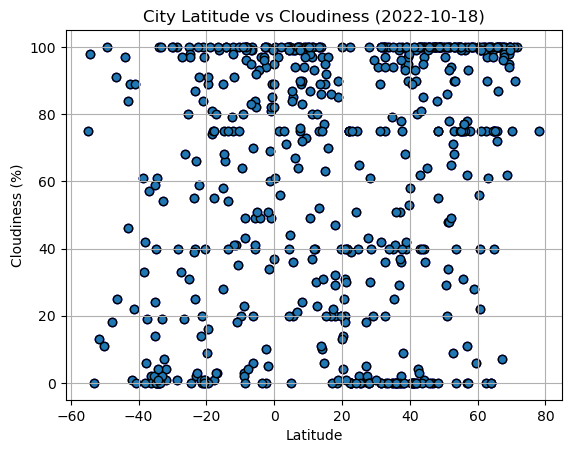

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values, color = 'blue')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2022-10-18)')
# Incorporate the other graph properties
plt.grid(True)
plt.scatter(x_values, y_values, edgecolors='k', linewidths=1)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

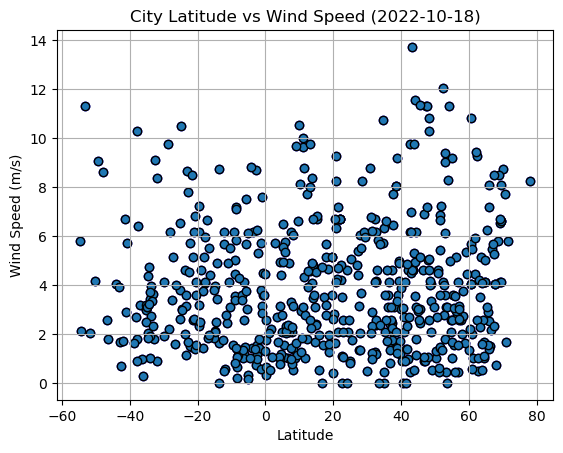

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values, color = 'blue')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2022-10-18)')
# Incorporate the other graph properties
plt.grid(True)
plt.scatter(x_values, y_values, edgecolors='k', linewidths=1)

# Save the figure
# plt.savefig("output_data/Fig4.png")

# Show plot
# plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def linear_regression_plot(city_data_df, x, y, title=None, x_position=0, y_position=0):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(city_data_df[x], city_data_df[y])
    regress = (city_data_df[x]) * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(city_data_df[x], city_data_df[y])
    plt.plot(city_data_df[x], regress, color='r')
    plt.annotate(line_eq, (x_position, y_position), fontsize=12, color='red')
    print(f'the r-value is: {rvalue**2}')
    if title:
        plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,salym,60.0625,71.4789,-2.43,95,100,1.36,RU,1699572063
3,ribeira grande,38.5167,-28.7000,20.99,94,94,8.05,PT,1699572064
4,tura,25.5198,90.2201,16.94,72,0,1.76,IN,1699572064
5,ghat,24.9647,10.1728,21.45,17,2,0.91,LY,1699572065
6,saacow,1.6279,42.4407,25.61,86,56,2.21,SO,1699572065


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ushuaia,-54.8000,-68.3000,9.81,71,75,5.81,AR,1699571766
2,margaret river,-33.9500,115.0667,13.83,71,100,3.43,AU,1699571933
9,invercargill,-46.4000,168.3500,12.79,60,25,1.79,NZ,1699572066
11,papatowai,-46.5619,169.4708,11.67,46,91,2.58,NZ,1699572067
12,adamstown,-25.0660,-130.1015,22.73,87,100,6.55,PN,1699571955


###  Temperature vs. Latitude Linear Regression Plot

the r-value is: 0.7266522264391013


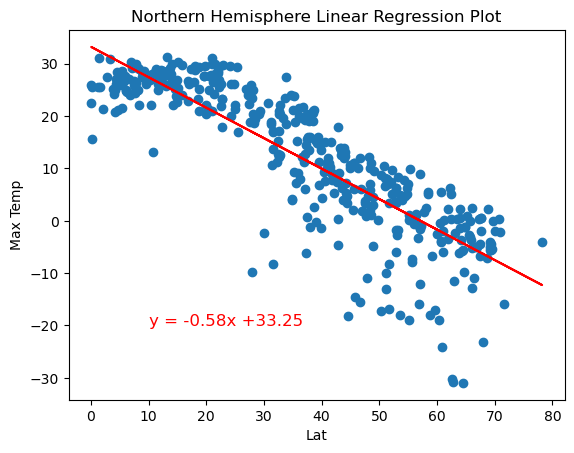

In [15]:
# Linear regression on Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Max Temp', 'Northern Hemisphere Linear Regression Plot', x_position = 10, y_position = -20)




the r-value is: 0.39603965494973836


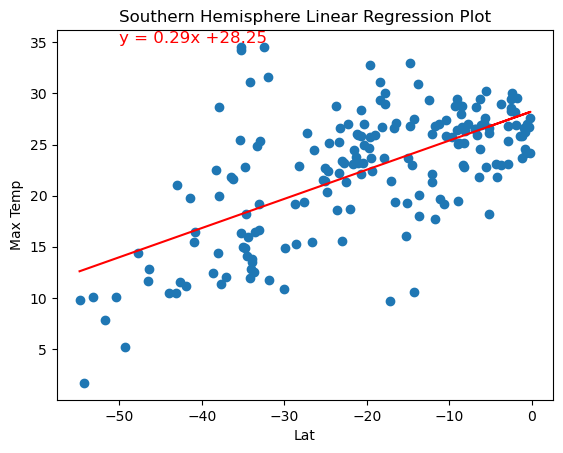

In [16]:
# Linear regression on Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Max Temp', 'Southern Hemisphere Linear Regression Plot', x_position = -50, y_position = 35)





**Discussion about the linear relationship:** in the northern hemisphere, there's a pretty significant relationship between temperature and distance from the equator - meaning the farther you move away from the equator, the colder it's most likely going to be.
in the southern hemisphere, you see the same trend just not as significant since the data doesn't contain the range that the northern hemisphere data does.  

### Humidity vs. Latitude Linear Regression Plot

the r-value is: 0.05294440180246881


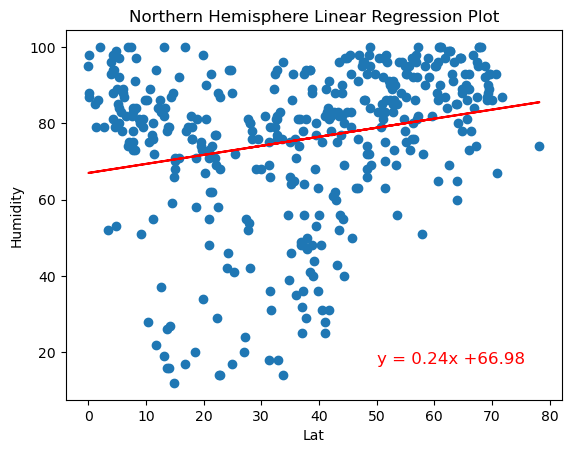

In [17]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Humidity', 'Northern Hemisphere Linear Regression Plot', x_position = 50, y_position = 17)

the r-value is: 0.09484460242158477


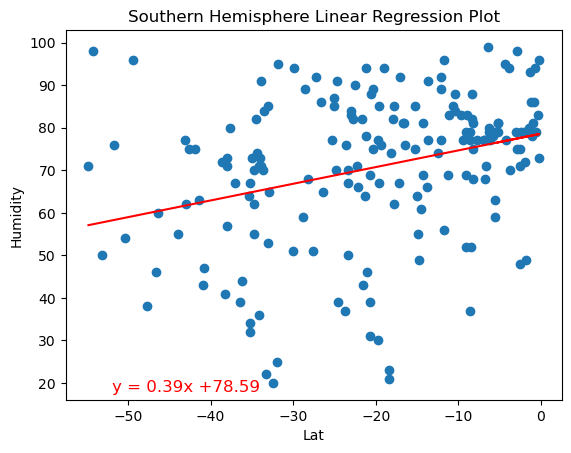

In [18]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Humidity', 'Southern Hemisphere Linear Regression Plot', x_position = -52, y_position = 18)

**Discussion about the linear relationship:** when looking at humidity and latitude, the northern hemisphere has the slightest positive correlation between the two (the farther you get from the equator the more humid it gets), but there are a LOT of outliers.. the relationship is NOT as significant as Taylor Swift and Travis Kelce's.

### Cloudiness vs. Latitude Linear Regression Plot

the r-value is: 0.02476483501509768


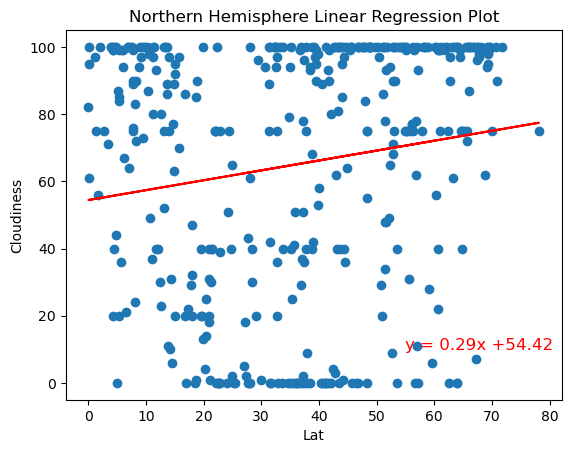

In [19]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Cloudiness', 'Northern Hemisphere Linear Regression Plot', x_position = 55, y_position = 10)



the r-value is: 0.08255588957088608


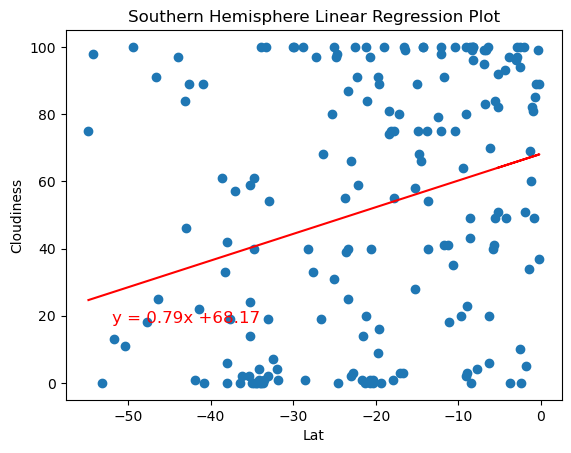

In [20]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Cloudiness', 'Southern Hemisphere Linear Regression Plot', x_position = -52, y_position = 18)



**Discussion about the linear relationship:** there's a slight increase in cloudiness the farther you are from the equator in the norhtern hemisphere but not in the southern hemisphere. there is a LOT of variation in our data.

### Wind Speed vs. Latitude Linear Regression Plot

the r-value is: 0.011475948885639357


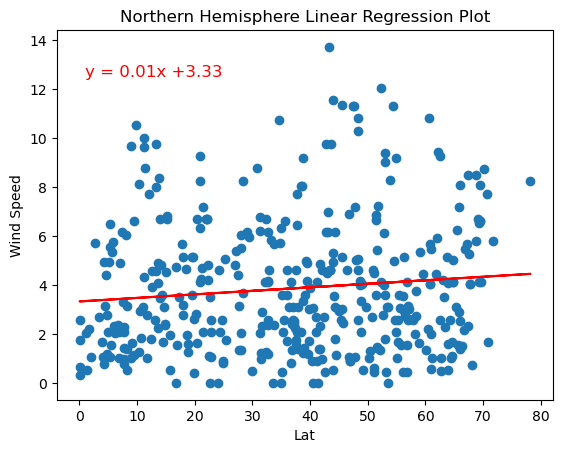

In [21]:
# Northern Hemisphere
linear_regression_plot(northern_hemi_df, 'Lat', 'Wind Speed', 'Northern Hemisphere Linear Regression Plot', x_position = 1, y_position =12.5)



the r-value is: 0.010656105412259363


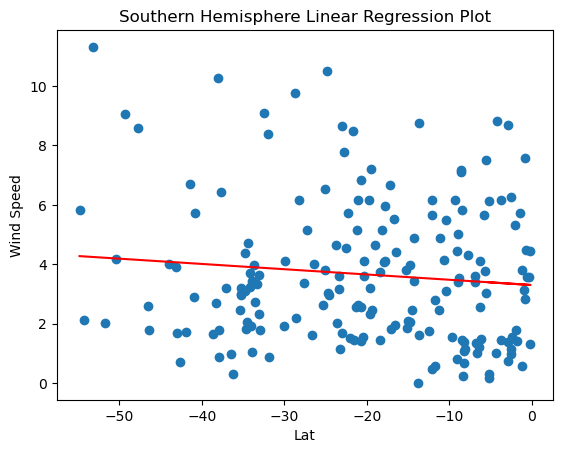

In [22]:
# Southern Hemisphere
linear_regression_plot(southern_hemi_df, 'Lat', 'Wind Speed', 'Southern Hemisphere Linear Regression Plot', x_position = -52, y_position = 13)



**Discussion about the linear relationship:** none of the correlations are significant but there does seem to be a trend where wind speed seems to decrease the further south you travel.